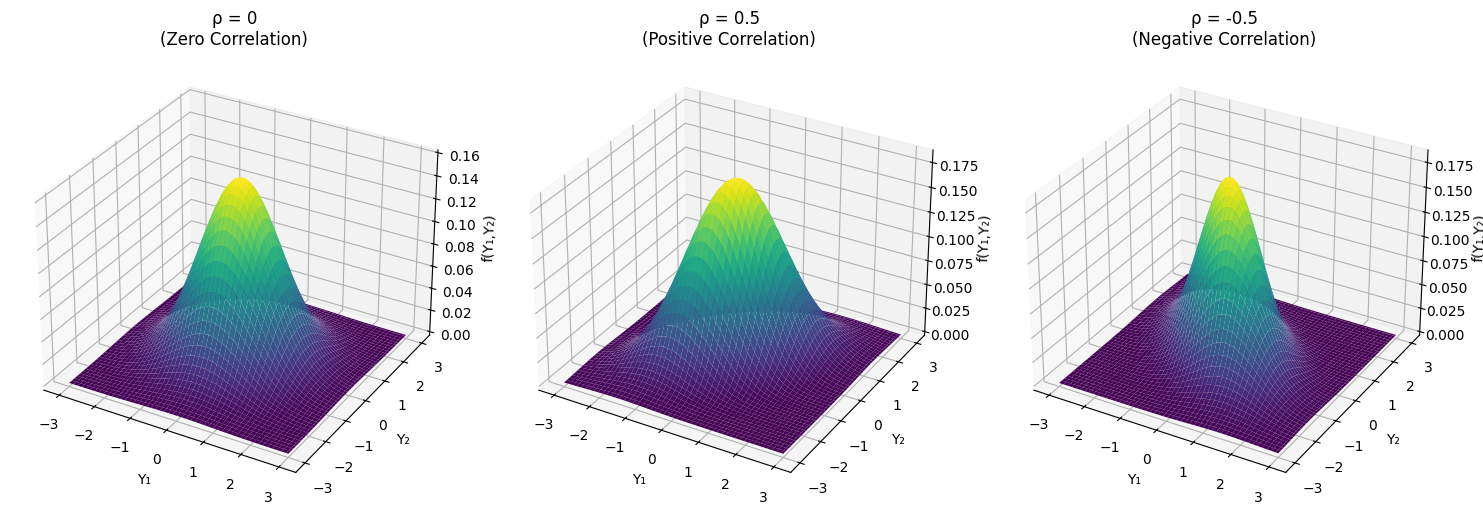

Verification of independence when ρ = 0:

1. When ρ = 0, the bivariate normal PDF simplifies to:
f(Y₁,Y₂) = 1/(2πσ₁σ₂) × exp{-1/2[(Y₁-μ₁)²/σ₁² + (Y₂-μ₂)²/σ₂²]}

2. This can be factored as:
f(Y₁,Y₂) = [1/(√(2π)σ₁)exp{-(Y₁-μ₁)²/(2σ₁²)}] × [1/(√(2π)σ₂)exp{-(Y₂-μ₂)²/(2σ₂²)}]

3. This is the product of two univariate normal PDFs, which proves independence


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

def bivariate_normal_pdf(x1, x2, mu1, mu2, sigma1, sigma2, rho):
    """
    Calculate bivariate normal PDF
    Parameters from the given formula:
    f(Y₁,Y₂) = 1/(2πσ₁σ₂√(1-ρ²)) × exp{-1/(2(1-ρ²))[(Y₁-μ₁)²/σ₁² - 2ρ(Y₁-μ₁)(Y₂-μ₂)/(σ₁σ₂) + (Y₂-μ₂)²/σ₂²]}
    """
    z1 = (x1 - mu1) / sigma1
    z2 = (x2 - mu2) / sigma2
    
    exp_term = -(1/(2*(1-rho**2))) * (z1**2 - 2*rho*z1*z2 + z2**2)
    coef = 1 / (2 * np.pi * sigma1 * sigma2 * np.sqrt(1-rho**2))
    
    return coef * np.exp(exp_term)

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

mu1, mu2 = 0, 0  
sigma1, sigma2 = 1, 1 

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
Z1 = bivariate_normal_pdf(X1, X2, mu1, mu2, sigma1, sigma2, rho=0)
surf1 = ax1.plot_surface(X1, X2, Z1, cmap='viridis')
ax1.set_title('ρ = 0\n(Zero Correlation)')

ax2 = fig.add_subplot(132, projection='3d')
Z2 = bivariate_normal_pdf(X1, X2, mu1, mu2, sigma1, sigma2, rho=0.5)
surf2 = ax2.plot_surface(X1, X2, Z2, cmap='viridis')
ax2.set_title('ρ = 0.5\n(Positive Correlation)')
ax3 = fig.add_subplot(133, projection='3d')
Z3 = bivariate_normal_pdf(X1, X2, mu1, mu2, sigma1, sigma2, rho=-0.5)
surf3 = ax3.plot_surface(X1, X2, Z3, cmap='viridis')
ax3.set_title('ρ = -0.5\n(Negative Correlation)')

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('Y₁')
    ax.set_ylabel('Y₂')
    ax.set_zlabel('f(Y₁,Y₂)')

plt.tight_layout()
plt.show()

print("Verification of independence when ρ = 0:")
print("\n1. When ρ = 0, the bivariate normal PDF simplifies to:")
print("f(Y₁,Y₂) = 1/(2πσ₁σ₂) × exp{-1/2[(Y₁-μ₁)²/σ₁² + (Y₂-μ₂)²/σ₂²]}")
print("\n2. This can be factored as:")
print("f(Y₁,Y₂) = [1/(√(2π)σ₁)exp{-(Y₁-μ₁)²/(2σ₁²)}] × [1/(√(2π)σ₂)exp{-(Y₂-μ₂)²/(2σ₂²)}]")
print("\n3. This is the product of two univariate normal PDFs, which proves independence")